In [1]:
import numpy as np

path = "C:/Users/Alexander/Desktop/Lab-ML/problem_set1/data"

## Assignment 4

How to check the resulting graph

In [2]:
from Assignment4 import lle

## Assignment 7

In [3]:
from numpy import load
import matplotlib.pyplot as plt
import sklearn.manifold as manifold
fishbowl = load(path + "/fishbowl_dense.npz")
flatroll = load(path + "/flatroll_data.npz")
swissroll = load(path + "/swissroll_data.npz")
print(fishbowl.files)
print(flatroll.files)
print(swissroll.files)

['X']
['Xflat', 'true_embedding']
['el', 'noise', 'e', 'name', 'distances', 'z', 'dataset', 'state', 'n', 'x', 'az', 'typ', 'col', 'x_noisefree', 'D']


(3, 2000)
(3, 400)
(2, 1000)


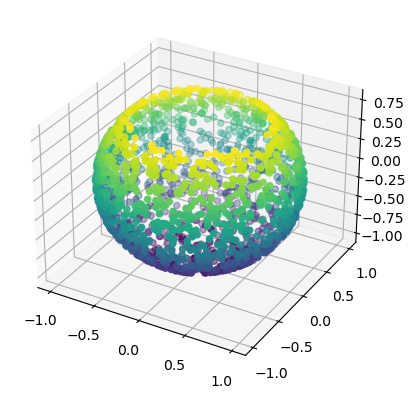

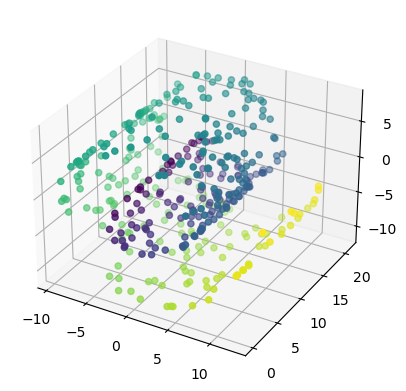

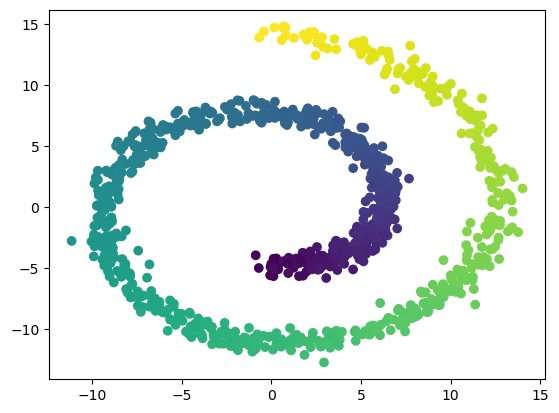

In [4]:
X = fishbowl['X']
print(X.shape)
x_noisefree = swissroll['x_noisefree']
print(x_noisefree.shape)
Xflat = flatroll['Xflat']
print(Xflat.shape)
fish_ax = plt.figure().add_subplot(projection='3d')
fish_ax.scatter(X[0],X[1],X[2], c = X.T[:, 2])
plt.show()
swiss_ax = plt.figure().add_subplot(projection='3d')
swiss_ax.scatter(x_noisefree[0],x_noisefree[1],x_noisefree[2], c = swissroll['z'].T[:,0])
plt.show()
plt.scatter(Xflat[0],Xflat[1], c = flatroll['true_embedding'])
plt.show()

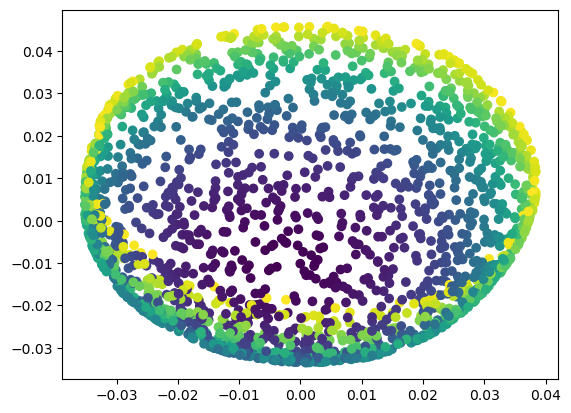

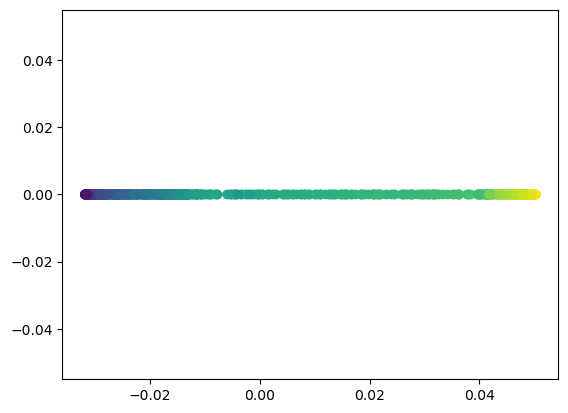

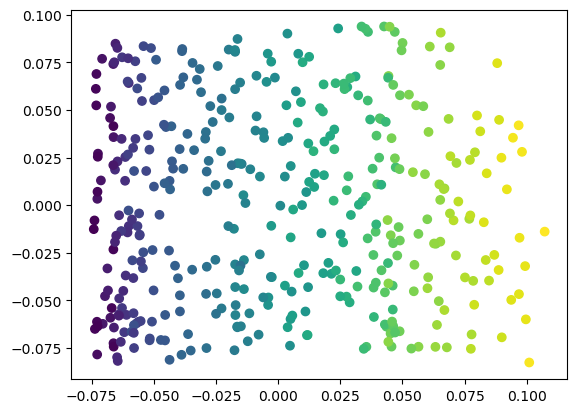

In [5]:
fish_lle = manifold.locally_linear_embedding(X.T,n_neighbors=25, n_components=2)
plt.scatter(fish_lle[0][:,0], fish_lle[0][:,1], c = X.T[:, 2])
plt.show()
flat_lle = manifold.locally_linear_embedding(Xflat.T,n_neighbors=7, n_components=1)
plt.scatter(flat_lle[0], np.zeros_like(flat_lle[0]), c = flatroll['true_embedding'])
plt.show()
swiss_lle = manifold.locally_linear_embedding(x_noisefree.T, n_neighbors=5, n_components=2)
plt.scatter(swiss_lle[0][:,0], swiss_lle[0][:,1], c = swissroll['z'].T[:,0])
plt.show()

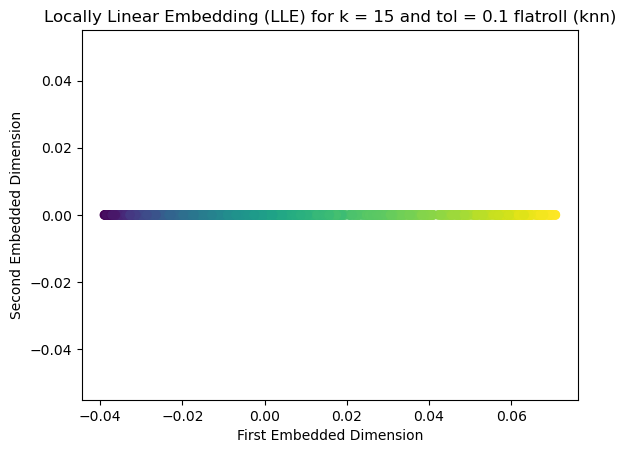

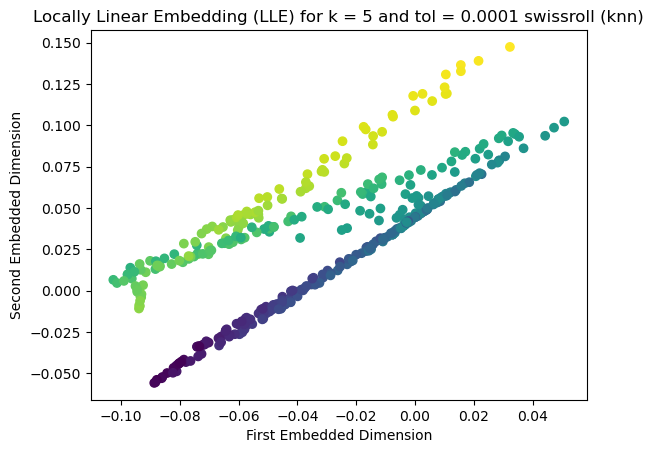

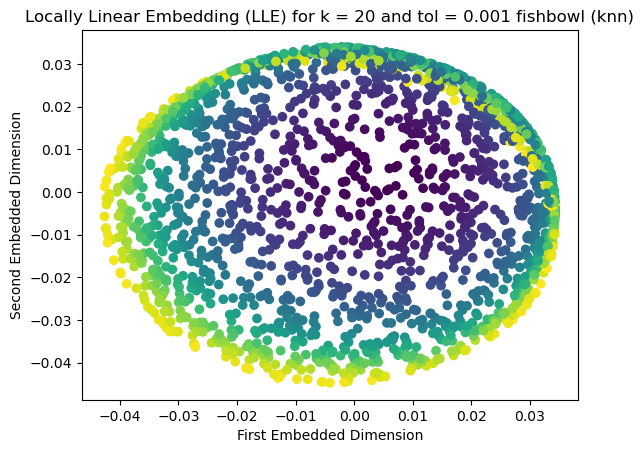

In [6]:
flat_lle = lle(Xflat.T,m=1,n_rule="knn", param=15,tol=0.1)
plt.scatter(flat_lle, np.zeros(flat_lle.shape[0]), c = flatroll['true_embedding'])
plt.title('Locally Linear Embedding (LLE) for k = ' + str(15) + " and tol = " + str(0.1) + " flatroll (knn)")
plt.xlabel('First Embedded Dimension')
plt.ylabel('Second Embedded Dimension')
plt.show()
swiss_lle = lle(x_noisefree.T, param=5, m=2, n_rule="knn",tol=1e-4)
plt.scatter(swiss_lle[:,0], swiss_lle[:,1], c = swissroll['z'].T[:,0])
plt.title('Locally Linear Embedding (LLE) for k = ' + str(5) + " and tol = " + str(1e-4) + " swissroll (knn)")
plt.xlabel('First Embedded Dimension')
plt.ylabel('Second Embedded Dimension')
plt.show()
fish_lle = lle(X.T,param=20,n_rule="knn", m=2,tol=1e-3)
plt.scatter(fish_lle[:,0], fish_lle[:,1], c = X.T[:, 2])
plt.title('Locally Linear Embedding (LLE) for k = ' + str(20) + " and tol = " + str(1e-3) + " fishbowl (knn)")
plt.xlabel('First Embedded Dimension')
plt.ylabel('Second Embedded Dimension')
plt.show()

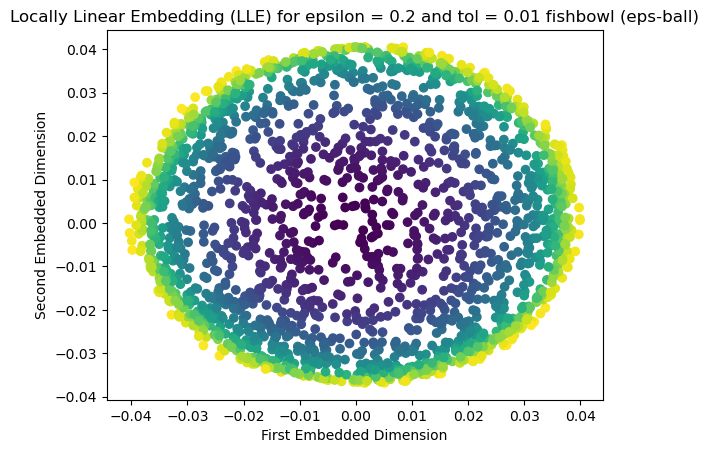

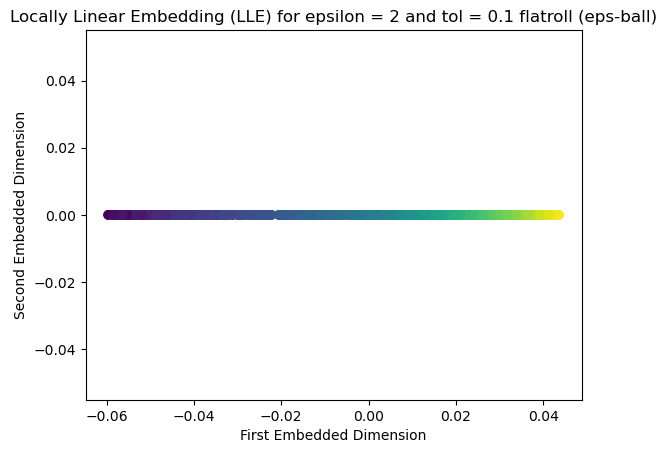

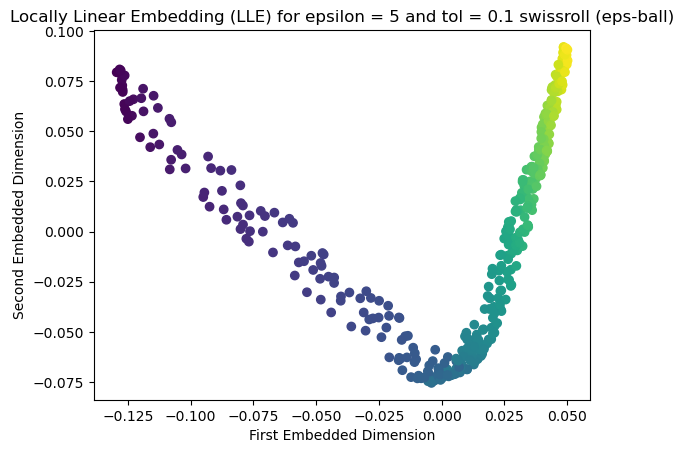

In [7]:
fish_lle = lle(X.T,param=0.2,n_rule="eps-ball", m=2,tol=1e-2)
plt.scatter(fish_lle[:,0], fish_lle[:,1], c = X.T[:, 2])
plt.title('Locally Linear Embedding (LLE) for epsilon = ' + str(0.2) + " and tol = " + str(1e-2) + " fishbowl (eps-ball)")
plt.xlabel('First Embedded Dimension')
plt.ylabel('Second Embedded Dimension')
plt.show()
flat_lle = lle(Xflat.T,m=1,n_rule="eps-ball", param=2,tol=1e-1)
plt.scatter(flat_lle, np.zeros(flat_lle.shape[0]), c = flatroll['true_embedding'])
plt.title('Locally Linear Embedding (LLE) for epsilon = ' + str(2) + " and tol = " + str(1e-1) + " flatroll (eps-ball)")
plt.xlabel('First Embedded Dimension')
plt.ylabel('Second Embedded Dimension')
plt.show()
swiss_lle = lle(x_noisefree.T, param=5, m=2, n_rule="eps-ball",tol=1e-1)
plt.scatter(swiss_lle[:,0], swiss_lle[:,1], c = swissroll['z'].T[:,0])
plt.title('Locally Linear Embedding (LLE) for epsilon = ' + str(5) + " and tol = " + str(1e-1) + " swissroll (eps-ball)")
plt.xlabel('First Embedded Dimension')
plt.ylabel('Second Embedded Dimension')
plt.show()